<a href="https://colab.research.google.com/github/selenafersa/rush4-bootcamp-data-epitech-groupe27/blob/main/Sel_rush4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from datetime import date, datetime
import math

**EDA**

In [ ]:
df = pd.read_csv('/content/Camp_Market (1).csv', sep=';')
df.head()
#lis le fichier/charge les données

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape
#affiche le nb de ligne et de colonne

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum()
#affiche le nb de valeur manquantes/nulles

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

#conversion des colonnes to DateTime format
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True, errors="coerce")


#calcul de l'age du client
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], errors='coerce').dt.year
df['Age'] = 2014 - df['Year_Birth']

df[['ID', 'Year_Birth', 'Age']]

,ID,Year_Birth,Age
0,5524,1970,44
1,2174,1970,44
2,4141,1970,44
3,6182,1970,44
4,5324,1970,44
...,...,...,...
2235,10870,1970,44
2236,4001,1970,44
2237,7270,1970,44
2238,8235,1970,44


In [ ]:
#clients sans revenue (revenus manquants)
clients_sans_income = df[df['Income'].isna()]
clients_sans_income.head()
clients_sans_income.shape[0]

24

**Feature engineering**

In [ ]:
#tri le nb de valeurs pour "education"
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
#drop les colonnes inutiles
df.drop(['ID','Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [ ]:
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
#quantité total depensée
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

#statut marital parternairfe ou non
df["Partner"] = df["Marital_Status"].replace({"Married": "Yes", "Together": "Yes", "Absurd": "No", "Widow": "No", "YOLO": "No", "Divorced": "No", "Single": "No", "Alone": "No"})

#segmentation du niveau d'education
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#calcul total d'enfants
df["Children"] = df["Kidhome"] +  df["Teenhome"]

#division des ages en groupe
df['Age_Group'] = pd.cut(x = df['Age'], bins = [1, 17, 24, 44, 64, 150], labels = ['Under 18','Young adult','Adult','Middel Aged','Senior'])

#nb total de campagnes acceptées
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']





In [ ]:
print(df.shape)
df.head()

(2240, 33)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education_Level,TotalMntSpent,Partner,Children,Age_Group,Total_Acc_Cmp
0,1970,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,44,Graduate,1617,No,0,Adult,1
1,1970,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,44,Graduate,27,No,2,Adult,0
2,1970,Graduation,Together,71613.0,0,0,NaT,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,44,Graduate,776,Yes,0,Adult,0
3,1970,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,44,Graduate,53,Yes,1,Adult,0
4,1970,PhD,Married,58293.0,1,0,NaT,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,44,Postgraduate,422,Yes,1,Adult,0


In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True, errors="coerce")


In [ ]:
#valeurs uniques dans le dataset selon chaque colonnes
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Year_Birth,1
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,263
Recency,100
MntWines,776
MntFruits,158


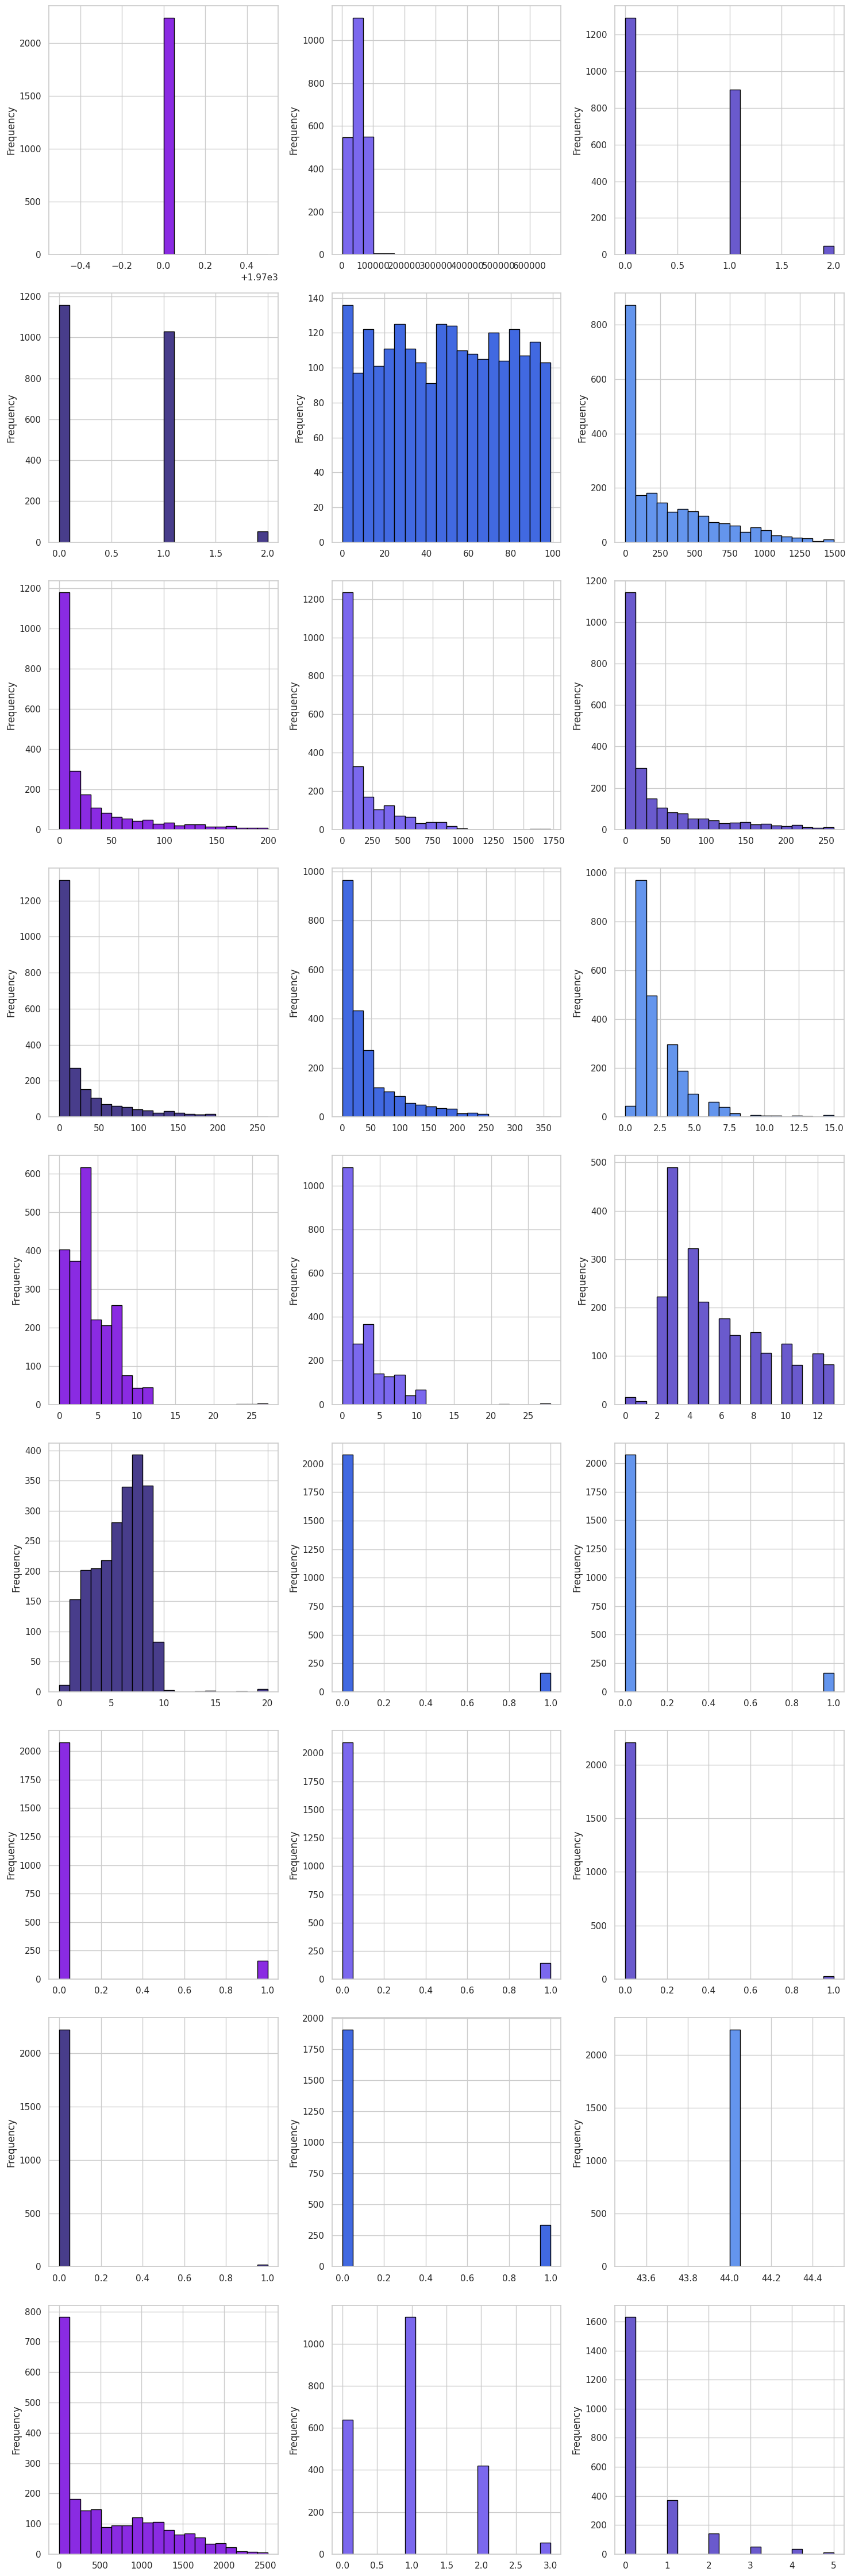

In [ ]:
#Graphique histogramme sur variables numériques
num_cols = df.select_dtypes(include=['int', 'float']).columns

# Nombre de colonnes numériques
n = len(num_cols)

# Dimensions de la grille (ajuste selon ton nombre de colonnes)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols  # arrondi vers le haut

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # pour parcourir facilement les axes
colors = ['#8A2BE2', '#7B68EE', '#6A5ACD', '#483D8B', '#4169E1', '#6495ED']  # 6 tons

for i, col in enumerate(num_cols):
    color = colors[i % len(colors)]
    df[col].plot(kind='hist',bins=20, color=color, edgecolor='black', ax=axes[i])

# Masquer les cases vides si le nombre de colonnes n’est pas multiple de n_cols
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

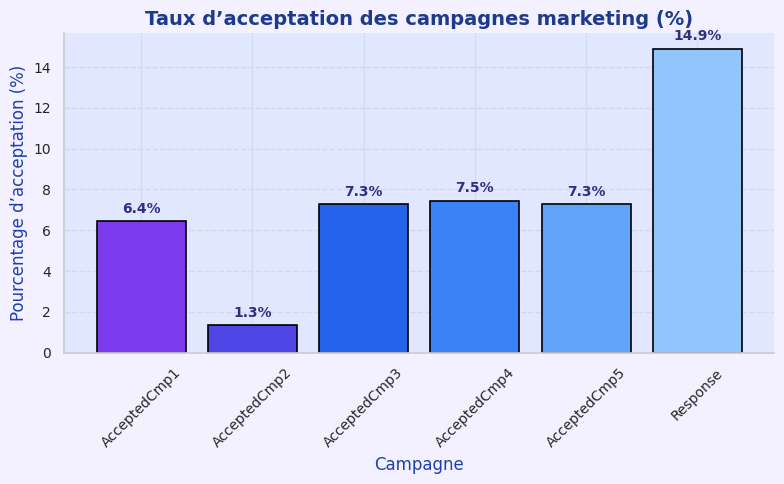

In [ ]:


# Colonnes des campagnes
cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

# Calcul les taux d’acceptation
acceptation_rates = df[cols].mean() * 100

colors = ['#7C3AED', '#4F46E5', '#2563EB', '#3B82F6', '#60A5FA', '#93C5FD']  # violet → bleu ciel

plt.figure(figsize=(8,5))
plt.bar(acceptation_rates.index, acceptation_rates.values, color=colors, edgecolor='black', linewidth=1.2)

plt.title("Taux d’acceptation des campagnes marketing (%)", fontsize=14, fontweight='bold', color='#1E3A8A')
plt.ylabel("Pourcentage d’acceptation (%)", fontsize=12, color='#1E40AF')
plt.xlabel("Campagne", fontsize=12, color='#1E40AF')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')


for i, v in enumerate(acceptation_rates.values):
    plt.text(i, v + 0.4, f"{v:.1f}%", ha='center', fontsize=10, fontweight='bold', color='#312E81')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2700932703.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=violet_blue_palette)


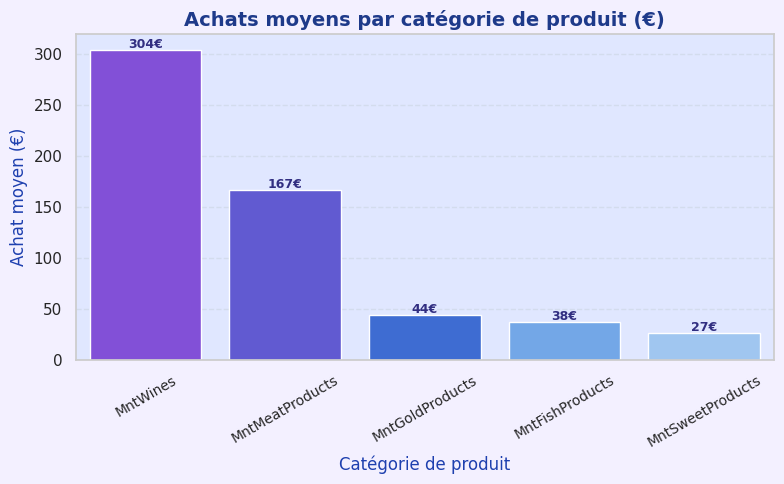

/tmp/ipython-input-2700932703.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Income', data=df, palette=['#60A5FA', '#7C3AED'])


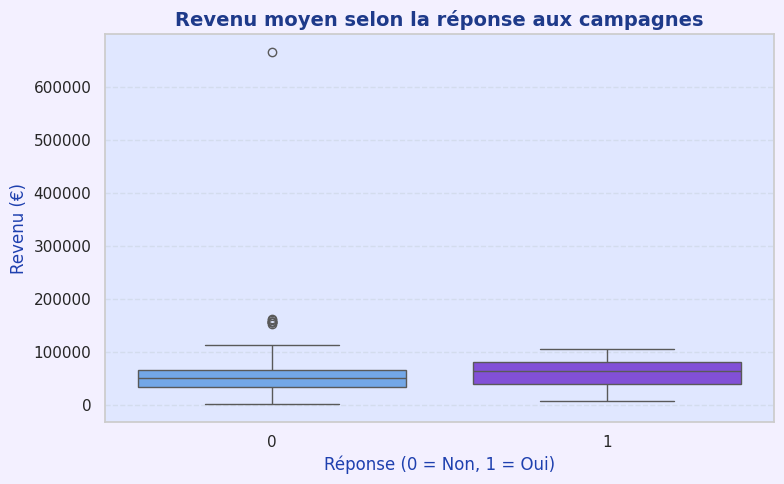

/tmp/ipython-input-2700932703.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


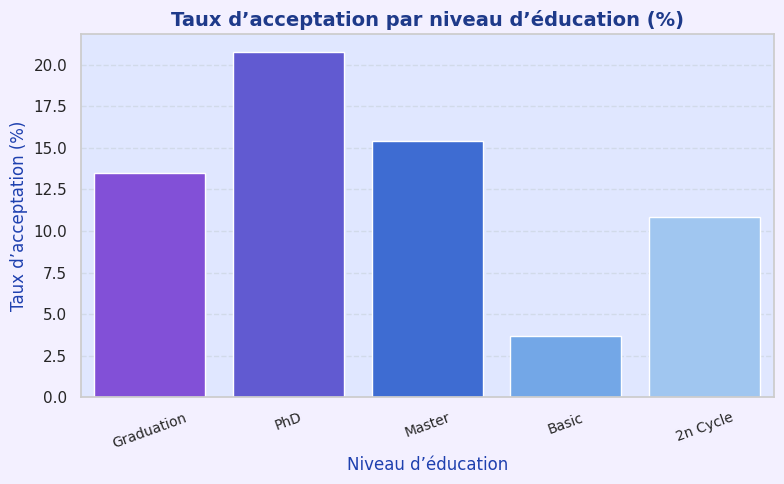

In [ ]:


# Rename column to ensure consistency
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.facecolor'] = '#E0E7FF'   # bleu clair
plt.rcParams['figure.facecolor'] = '#F3F0FF' # fond global violet très clair
plt.rcParams['grid.color'] = '#CBD5E1'
plt.rcParams['grid.alpha'] = 0.6

violet_blue_palette = ['#7C3AED', '#4F46E5', '#2563EB', '#60A5FA', '#93C5FD']  # violet → bleu ciel


mnt_cols = ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
Achats_moyens = df[mnt_cols].mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=violet_blue_palette)
plt.title("Achats moyens par catégorie de produit (€)", color='#1E3A8A')
plt.ylabel("Achat moyen (€)", color='#1E40AF')
plt.xlabel("Catégorie de produit", color='#1E40AF')
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, v in enumerate(Achats_moyens.values):
    plt.text(i, v + 2, f"{v:.0f}€", ha='center', fontsize=9, fontweight='bold', color='#312E81')

plt.tight_layout()
plt.show()
legend=False
# Revenu moyen selon la réponse aux campagnes

plt.figure()
sns.boxplot(x='Response', y='Income', data=df, palette=['#60A5FA', '#7C3AED'])
plt.title("Revenu moyen selon la réponse aux campagnes", color='#1E3A8A')
plt.xlabel("Réponse (0 = Non, 1 = Oui)", color='#1E40AF')
plt.ylabel("Revenu (€)", color='#1E40AF')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Taux d’acceptation par niveau d’éducation

plt.figure()
sns.barplot(
    x='Education',
    y='Response',
    data=df,
    estimator=lambda x: 100 * x.mean(),
    palette=violet_blue_palette,
    errorbar=None
)
plt.title("Taux d’acceptation par niveau d’éducation (%)", color='#1E3A8A')
plt.ylabel("Taux d’acceptation (%)", color='#1E40AF')
plt.xlabel("Niveau d’éducation", color='#1E40AF')
plt.xticks(rotation=20, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


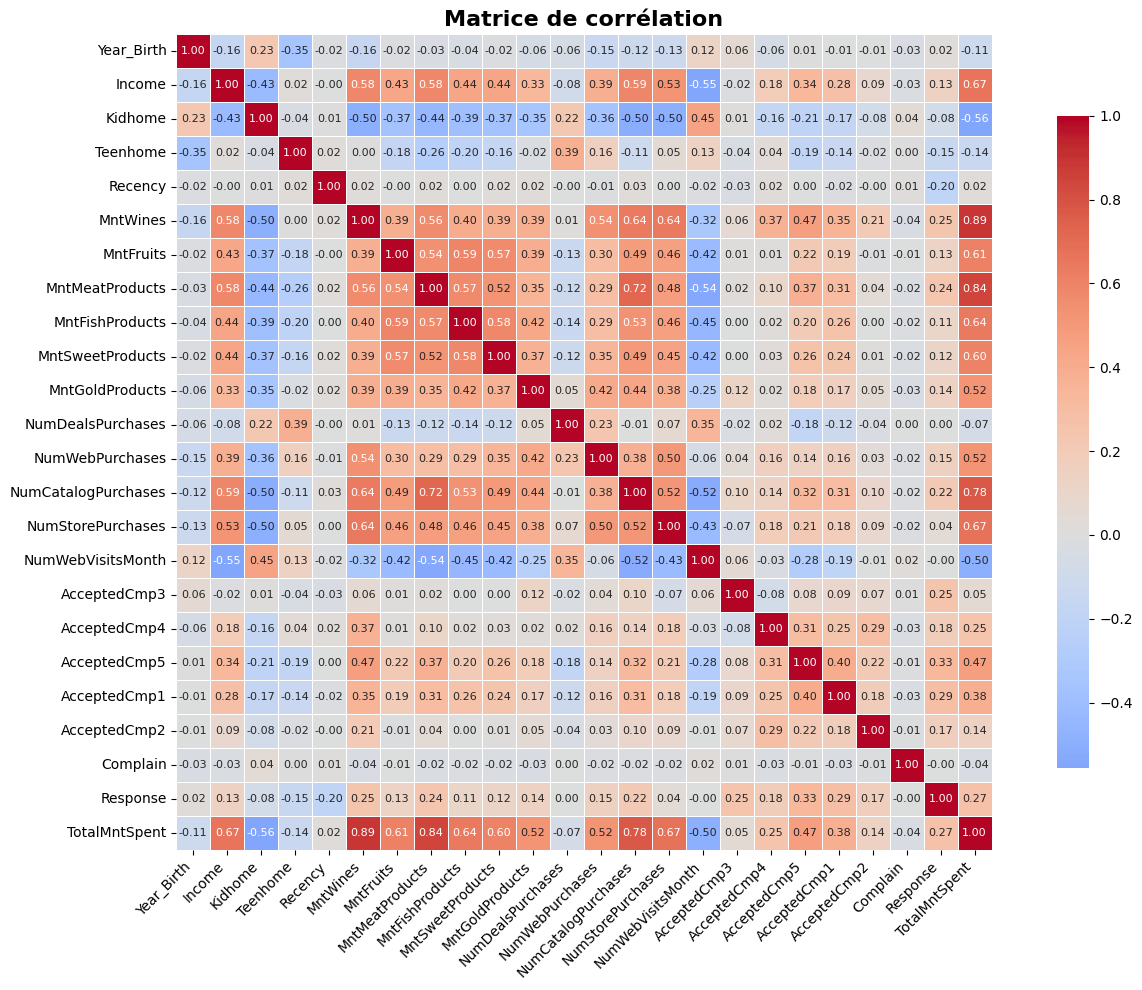

In [ ]:

# Supprimer les colonnes avant la corrélation
data_filtered = df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"])

# Calcul de la matrice de corrélation
corr_matrix = data_filtered.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)
plt.title("Matrice de corrélation", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

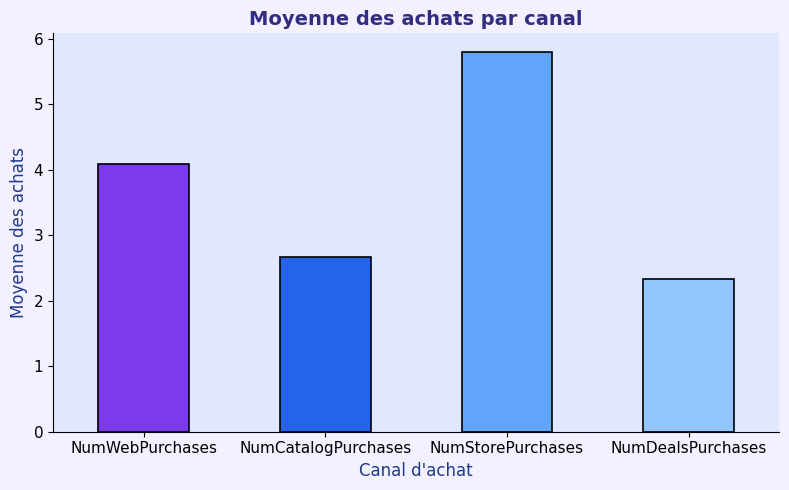

In [ ]:
# Calcul de la moyenne des achats par canal
avg_channels = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumDealsPurchases']].mean()

colors = ['#7C3AED', '#2563EB', '#60A5FA', '#93C5FD']  # violet, bleu foncé, bleu moyen, bleu ciel

plt.figure(figsize=(8, 5))
avg_channels.plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

plt.title("Moyenne des achats par canal", fontsize=14, fontweight='bold', color='#312E81')
plt.xlabel("Canal d'achat", fontsize=12, color='#1E3A8A')
plt.ylabel("Moyenne des achats", fontsize=12, color='#1E3A8A')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


# L'impact des campagnes marketing sur les dépenses des clients

## Calcul de la dépense moyenne (average spending) en fonction de l’acceptation ou non des campagnes marketing



*Calcul de la dépense moyenne totale (TotalSpent) pour les clients qui ont accepté une campagne marketing et ceux qui ne l’ont pas acceptée, pour chaque campagne individuellement



In [ ]:
import pandas as pd

df = pd.read_csv('/content/Camp_Market (1).csv', sep=';')

df.rename(columns={'MntGoldProds': 'MntGoldProducts'}, inplace=True)
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_spending = {}

for col in campaign_cols:
    campaign_spending[col] = df.groupby(col)['TotalMntSpent'].mean()

for campaign, spending in campaign_spending.items():
    print(f"Dépense moyenne pour {campaign}:")
    print(spending)
    print("-" * 30)

Dépense moyenne pour AcceptedCmp1:
AcceptedCmp1
0     545.585878
1    1482.222222
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour AcceptedCmp2:
AcceptedCmp2
0     596.270588
1    1307.666667
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour AcceptedCmp3:
AcceptedCmp3
0    596.793452
1    720.539877
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour AcceptedCmp4:
AcceptedCmp4
0     562.511336
1    1143.125749
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour AcceptedCmp5:
AcceptedCmp5
0     526.510351
1    1616.110429
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour Response:
Response
0    538.929171
1    987.392216
Name: TotalMntSpent, dtype: float64
------------------------------


## Visualisation des dépenses en fonction des campagnes acceptées







**Pour chaque campagne : la dépense moyenne par les clients qui ont accepté et ceux qui n’ont pas accepté chaque campagne.



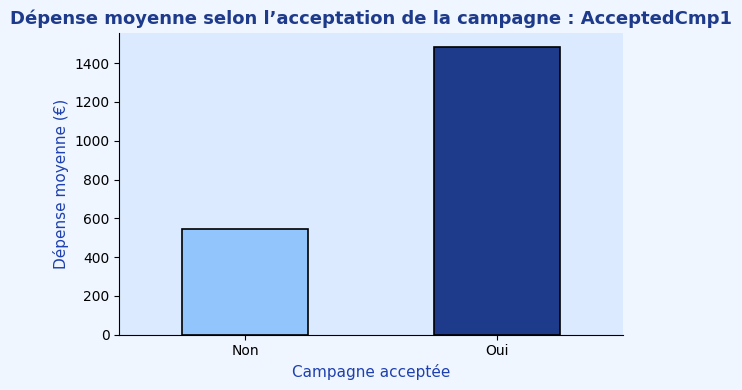

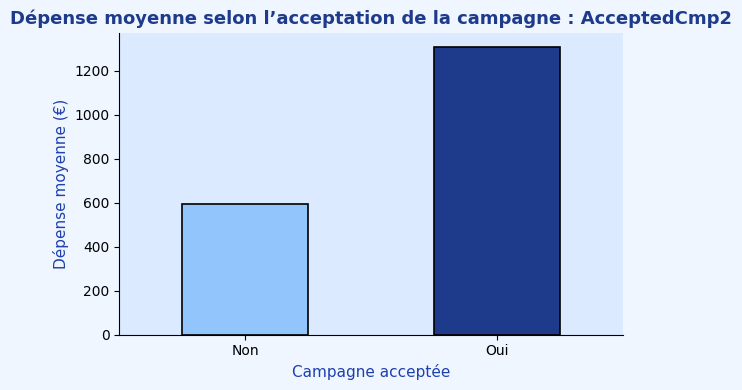

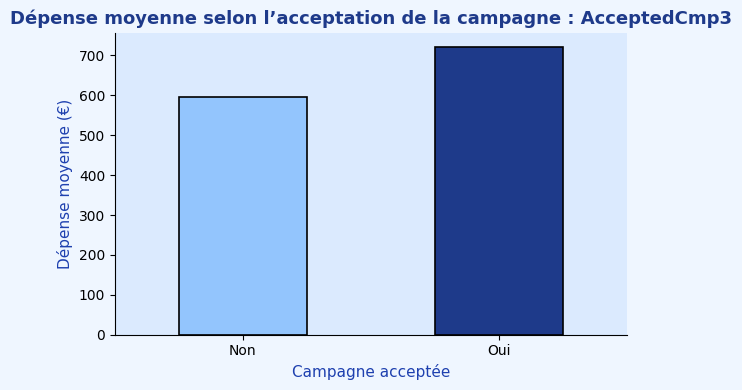

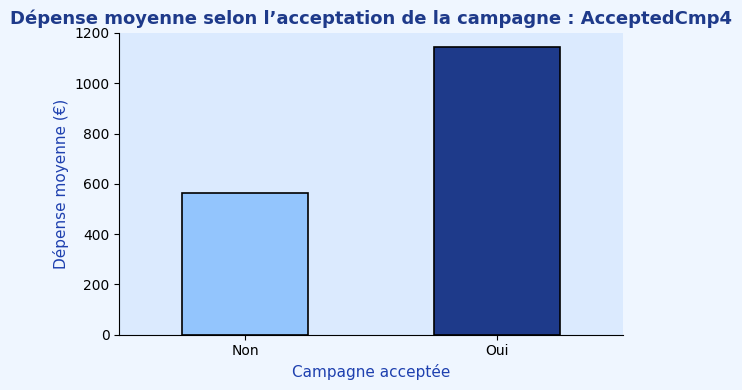

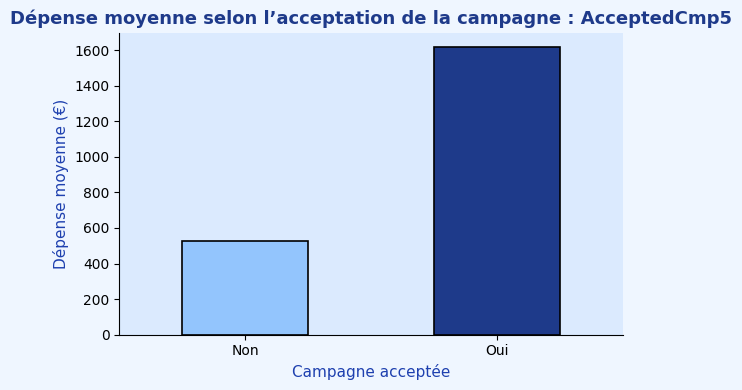

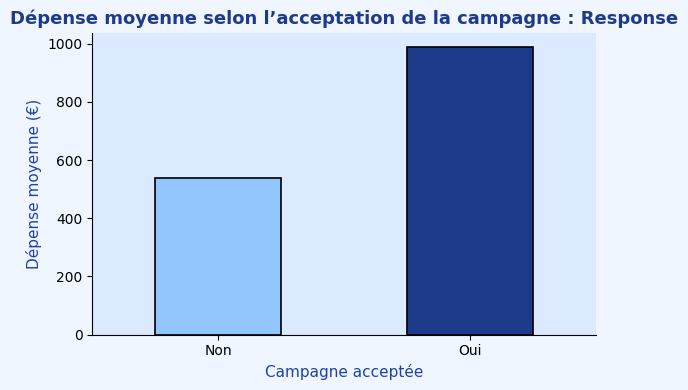

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_spending = {}

for col in campaign_cols:
    campaign_spending[col] = df.groupby(col)['TotalSpent'].mean()

blue_gradient = ['#93C5FD', '#1E3A8A']
background_color = '#EFF6FF'
chart_color = '#DBEAFE'

for campaign, spending in campaign_spending.items():
    plt.figure(figsize=(6, 4))

    spending.plot(
        kind='bar',
        color=blue_gradient,
        edgecolor='black',
        linewidth=1.2
    )

    plt.title(f"Dépense moyenne selon l’acceptation de la campagne : {campaign}",
              fontsize=13, fontweight='bold', color='#1E3A8A')
    plt.xlabel("Campagne acceptée", fontsize=11, color='#1E40AF')
    plt.ylabel("Dépense moyenne (€)", fontsize=11, color='#1E40AF')
    plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'], rotation=0, fontsize=10)
    plt.yticks(fontsize=10)

    fig = plt.gcf()
    ax = plt.gca()
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(chart_color)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()


## Analyse des campagnes acceptées et dépenses effectuées par les clients

### Pour avoir la relation entre le nombre total de campagnes acceptées des clients et les dépenses totales effectuées  


In [ ]:
df.rename(columns={'MntGoldProds': 'MntGoldProducts'}, inplace=True)
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
avg_spending_by_total_campaigns = df.groupby('Total_Acc_Cmp')['TotalMntSpent'].mean()
print("Dépense moyenne selon le nombre total de campagnes acceptées")
print(avg_spending_by_total_campaigns)

Dépense moyenne selon le nombre total de campagnes acceptées
Total_Acc_Cmp
0     458.109135
1     830.097297
2    1066.591549
3    1486.921569
4    1673.527778
5    1514.000000
Name: TotalMntSpent, dtype: float64


In [ ]:
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
avg_spending_by_total_campaigns = df.groupby('Total_Acc_Cmp')['TotalMntSpent'].mean()
print("Dépense moyenne selon le nombre total de campagnes acceptées.")
print(avg_spending_by_total_campaigns)

Dépense moyenne selon le nombre total de campagnes acceptées.
Total_Acc_Cmp
0     458.109135
1     830.097297
2    1066.591549
3    1486.921569
4    1673.527778
5    1514.000000
Name: TotalMntSpent, dtype: float64


## Visualisation des campagnes acceptées en fonction des dépenses total des clients



Avec variable préalablement calculée avg_spending_by_total_campaigns.


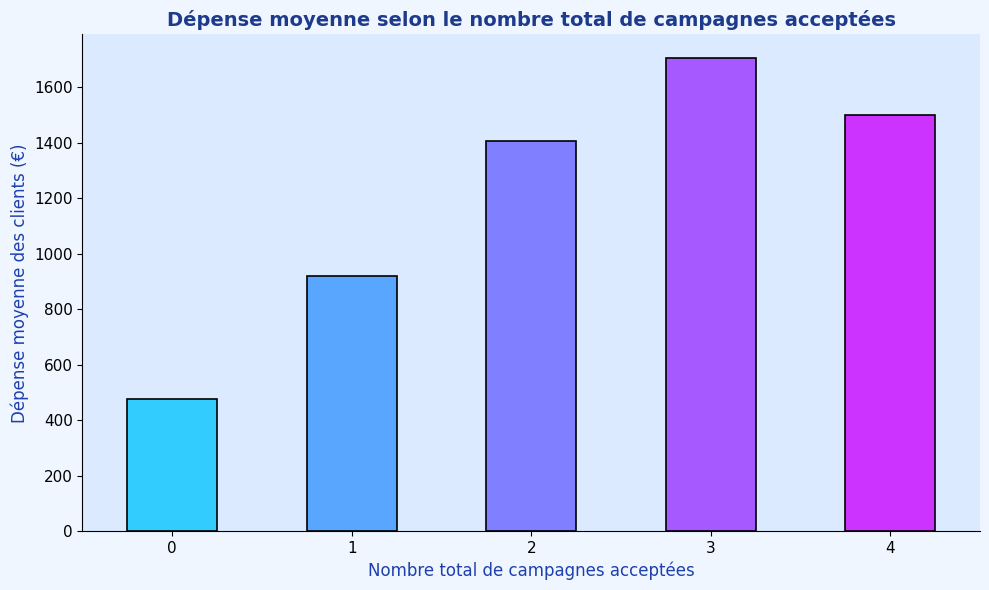

In [ ]:
df.rename(columns={'MntGoldProds': 'MntGoldProducts'}, inplace=True)
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']
df['TotalAcceptedCmp'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

# Calcul de la dépense moyenne par nombre total de campagnes acceptées
avg_spending_by_total_campaigns = df.groupby('TotalAcceptedCmp')['TotalSpent'].mean()

plt.figure(figsize=(10, 6))

colors = plt.cm.cool(np.linspace(0.2, 0.8, len(avg_spending_by_total_campaigns)))

avg_spending_by_total_campaigns.plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

plt.title("Dépense moyenne selon le nombre total de campagnes acceptées",
          fontsize=14, fontweight='bold', color='#1E3A8A')
plt.xlabel("Nombre total de campagnes acceptées", fontsize=12, color='#1E40AF')
plt.ylabel("Dépense moyenne des clients (€)", fontsize=12, color='#1E40AF')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#EFF6FF')
ax.set_facecolor('#DBEAFE')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.show()


Features engineering

In [ ]:
df = pd.read_csv('/content/Camp_Market (1).csv', sep=';')

# Rename column
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

# Création de variables
df['Age'] = 2014 - df['Year_Birth']
df['Children'] = df['Kidhome'] + df['Teenhome']
df['TotalSpent'] = df[['MntWines','MntFruits','MntMeatProducts',
                           'MntFishProducts','MntSweetProducts','MntGoldProducts']].sum(axis=1)
df['TotalAcceptedCmp'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                                 'AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

In [ ]:
df['TotalPurchases'] = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

# Conversion de la date en vrai format et calcul de l'ancienneté client
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['CustomerSince'] = 2025 - df['Dt_Customer'].dt.year

In [ ]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'TotalPurchases', 'Dt_Customer', 'CustomerSince']].head()


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalPurchases,Dt_Customer,CustomerSince
0,8,10,4,22,2012-09-04,13
1,1,1,2,4,2014-03-08,11
2,8,2,10,20,2013-08-21,12
3,2,0,4,6,2014-02-10,11
4,5,3,6,14,2014-01-19,11
